In [5]:
import logging
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s",
    handlers=[logging.StreamHandler()]
)

logger = logging.getLogger(__name__)

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [7]:
DATA_PATH = "../.data/processed/user_features.parquet"

In [8]:
df = pd.read_parquet(DATA_PATH)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15639803 entries, 0 to 15639802
Data columns (total 13 columns):
 #   Column              Dtype              
---  ------              -----              
 0   user_id             int64              
 1   count_view          int64              
 2   count_cart          int64              
 3   count_purchase      int64              
 4   unique_sessions     int64              
 5   active_days         int64              
 6   recency_days        int64              
 7   total_spent         float64            
 8   avg_purchase_price  float64            
 9   first_event         datetime64[ns, UTC]
 10  last_event          datetime64[ns, UTC]
 11  fav_main_category   object             
 12  fav_sub_category    object             
dtypes: datetime64[ns, UTC](2), float64(2), int64(7), object(2)
memory usage: 1.5+ GB


In [10]:
df.describe()

,user_id,count_view,count_cart,count_purchase,unique_sessions,active_days,recency_days,total_spent,avg_purchase_price
count,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07,1.563980e+07
mean,5.825121e+08,2.466443e+01,1.222142e+00,4.379099e-01,5.784033e+00,3.862482e+00,4.393321e+00,1.315520e+02,2.003042e+01
std,4.000711e+07,1.087562e+02,5.693922e+00,3.164790e+00,5.629168e+01,6.607303e+00,4.418245e+00,1.378567e+03,9.205336e+01
min,1.030022e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.528027e+08,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.862203e+08,4.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
75%,6.151136e+08,1.700000e+01,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00
max,6.497760e+08,1.991750e+05,2.342000e+03,2.120000e+03,1.306690e+05,2.170000e+02,2.100000e+01,7.901209e+05,2.574070e+03


In [19]:
df.head(10)

,user_id,count_view,count_cart,count_purchase,unique_sessions,active_days,recency_days,total_spent,avg_purchase_price,first_event,last_event,fav_main_category,fav_sub_category
0,10300217,1,0,0,1,1,9,0.0,0.0,2019-11-06 06:51:52+00:00,2019-11-06 06:51:52+00:00,unknown,unknown
1,12511517,2,0,0,2,2,5,0.0,0.0,2020-02-24 05:52:05+00:00,2020-03-08 17:23:57+00:00,apparel,shoes.moccasins
2,22165363,14,0,0,13,9,0,0.0,0.0,2020-01-30 08:17:02+00:00,2020-03-13 05:04:50+00:00,computers,bedroom.bed
3,27396220,1,0,0,1,1,6,0.0,0.0,2020-04-10 04:21:00+00:00,2020-04-10 04:21:00+00:00,construction,components.faucet
4,29515875,23,0,0,14,9,2,0.0,0.0,2019-11-10 02:08:39+00:00,2020-04-23 05:03:44+00:00,furniture,bedroom.bed
5,29830839,1,0,0,1,1,10,0.0,0.0,2020-01-21 19:25:37+00:00,2020-01-21 19:25:37+00:00,furniture,kitchen.table
6,29990697,17,0,0,8,7,0,0.0,0.0,2019-12-31 12:41:49+00:00,2020-04-29 15:55:27+00:00,unknown,unknown
7,30493659,2,0,0,2,2,5,0.0,0.0,2019-12-22 18:49:44+00:00,2019-12-23 04:50:04+00:00,construction,tools.light
8,31198833,24,0,0,6,6,2,0.0,0.0,2019-11-08 02:09:45+00:00,2020-01-07 09:45:52+00:00,electronics,kitchen.grill
9,31490434,4,0,0,4,4,0,0.0,0.0,2020-02-15 09:48:37+00:00,2020-03-06 12:06:47+00:00,electronics,camera.photo


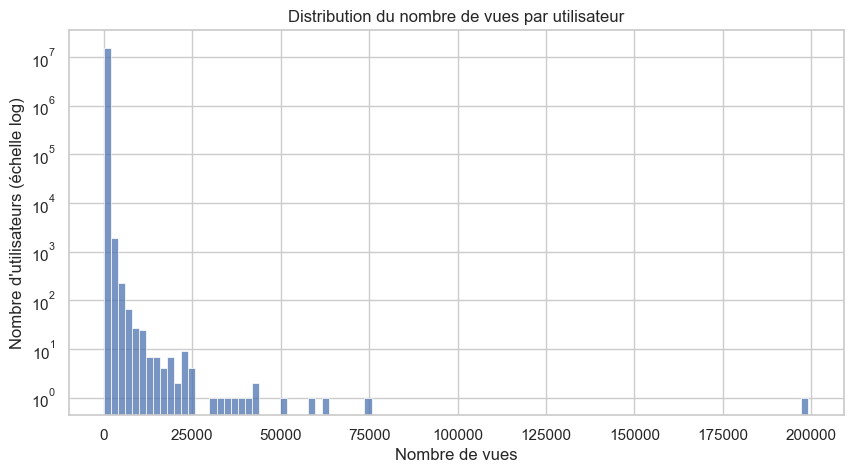

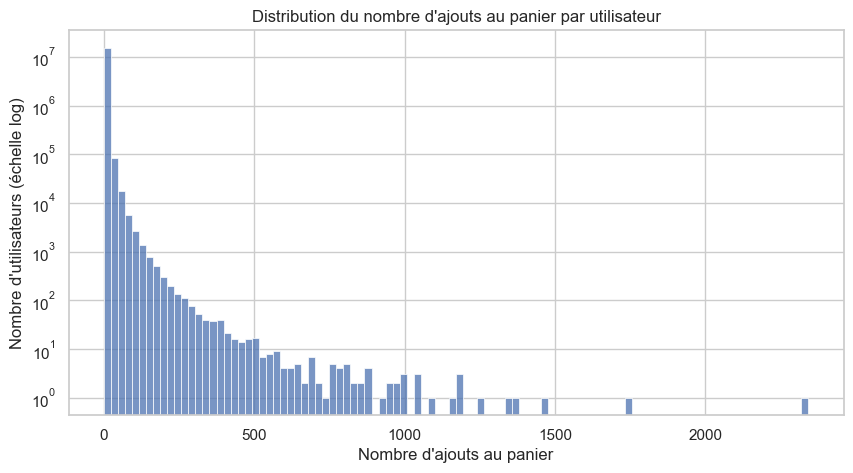

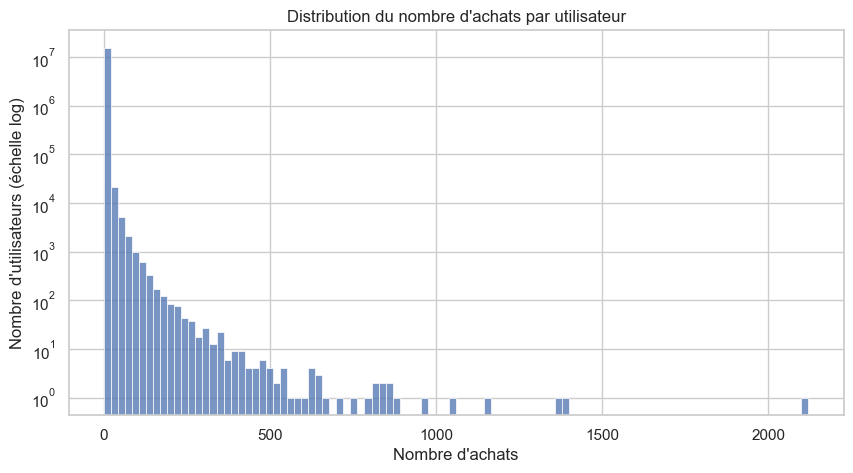

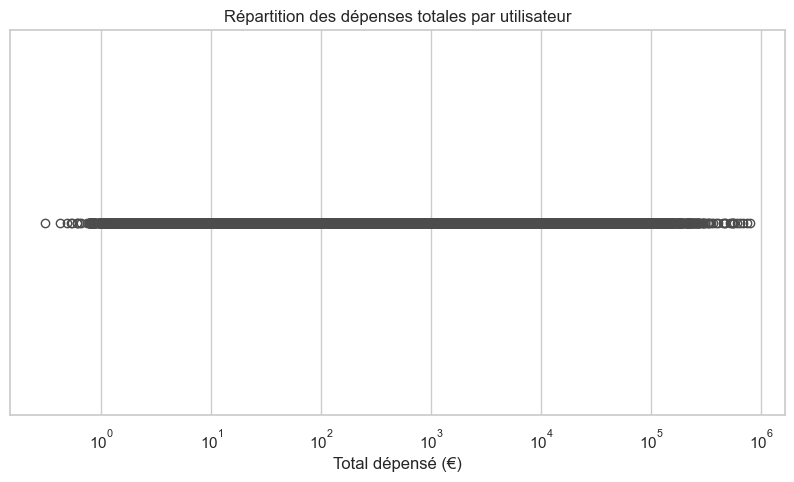

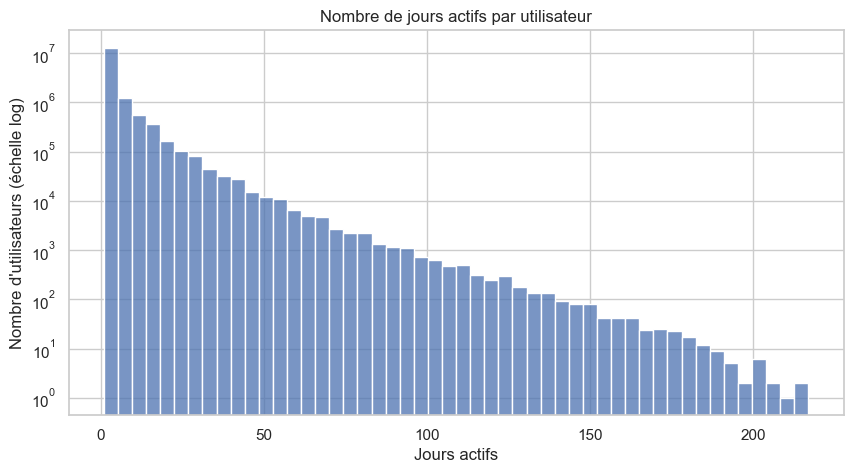

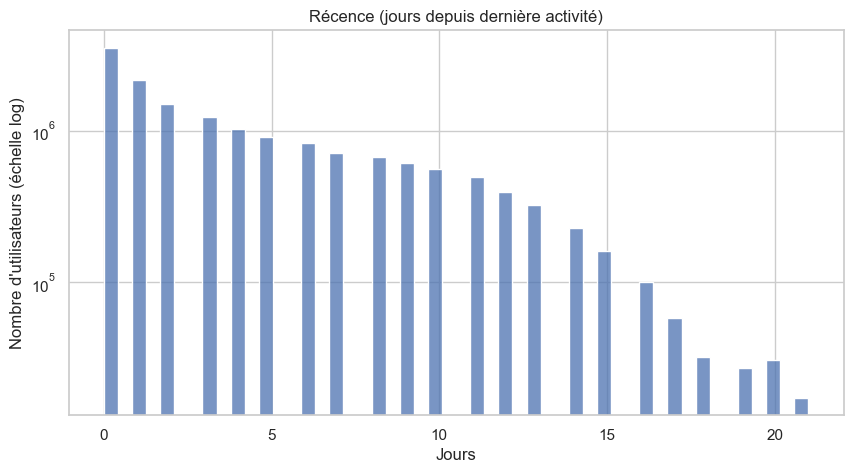

In [21]:

# 1. Nombre de vues
sns.histplot(df["count_view"], bins=100)
plt.yscale("log")
plt.title("Distribution du nombre de vues par utilisateur")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre d'utilisateurs (échelle log)")
plt.show()

# 2. Nombre de paniers
sns.histplot(df["count_cart"], bins=100)
plt.yscale("log")
plt.title("Distribution du nombre d'ajouts au panier par utilisateur")
plt.xlabel("Nombre d'ajouts au panier")
plt.ylabel("Nombre d'utilisateurs (échelle log)")
plt.show()

# 3. Nombre d’achats
sns.histplot(df["count_purchase"], bins=100)
plt.yscale("log")
plt.title("Distribution du nombre d'achats par utilisateur")
plt.xlabel("Nombre d'achats")
plt.ylabel("Nombre d'utilisateurs (échelle log)")
plt.show()

# 4. Dépenses totales
sns.boxplot(x=df["total_spent"])
plt.title("Répartition des dépenses totales par utilisateur")
plt.xlabel("Total dépensé (€)")
plt.xscale("log")  # facultatif selon l'asymétrie
plt.show()

# 5. Jours actifs
sns.histplot(df["active_days"], bins=50)
plt.yscale("log")
plt.title("Nombre de jours actifs par utilisateur")
plt.xlabel("Jours actifs")
plt.ylabel("Nombre d'utilisateurs (échelle log)")
plt.show()

# 6. Récence
sns.histplot(df["recency_days"], bins=50)
plt.yscale("log")
plt.title("Récence (jours depuis dernière activité)")
plt.xlabel("Jours")
plt.ylabel("Nombre d'utilisateurs (échelle log)")
plt.show()

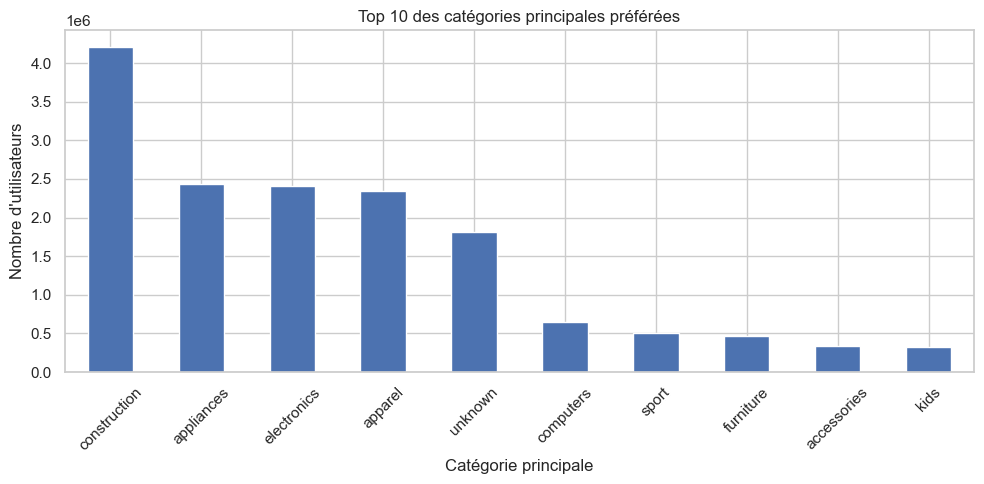

In [22]:
# Top 10 des catégories principales
plt.figure(figsize=(10, 5))
df["fav_main_category"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des catégories principales préférées")
plt.xlabel("Catégorie principale")
plt.ylabel("Nombre d'utilisateurs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

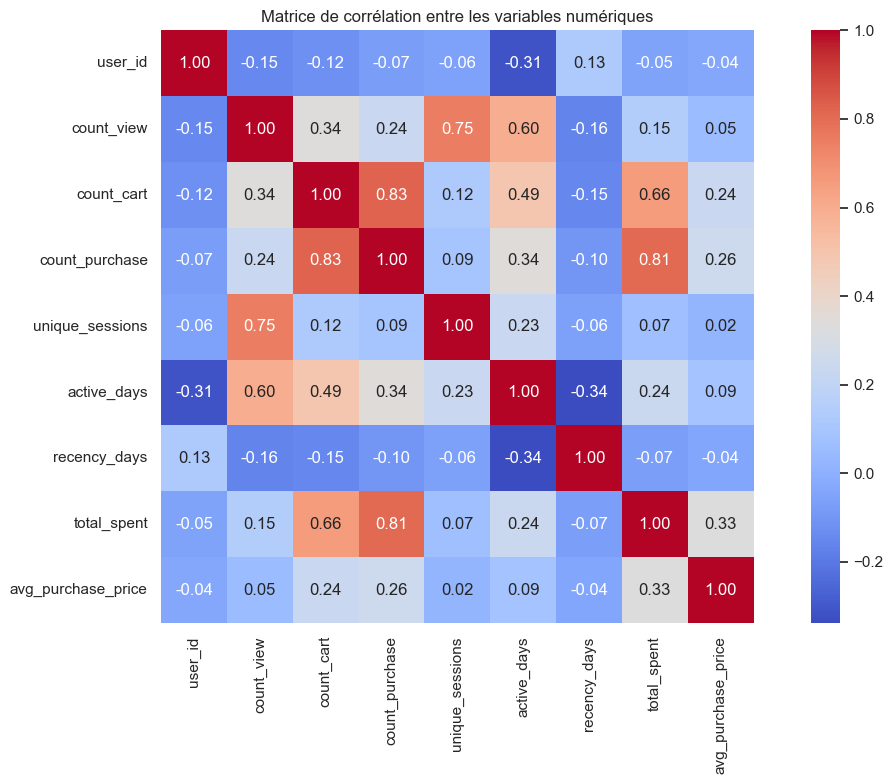

In [23]:
# Corrélations entre variables numériques
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include="number")
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation entre les variables numériques")
plt.tight_layout()
plt.show()